Question-3

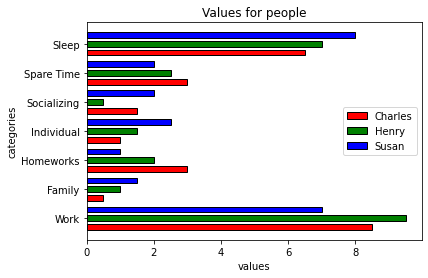

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('DailyActivities.xlsx')
persons = df.columns[1:]

categories = df.iloc[:, 0]
values = [list(df[person]) for person in persons]

fig, ax = plt.subplots()

colors = ['red', 'green', 'blue']

for i in range(len(categories)):
    for j in range(3):
        ax.barh(i - 0.3 + (j * 0.3), values[j][i], height=0.2, color=colors[j], edgecolor='black')

ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)

ax.set_xlabel('values')
ax.set_ylabel('categories')
ax.set_title('Values for people')
ax.legend(persons)

plt.show()

Question-4

In [14]:
import numpy as np
import pandas as pd
df = pd.read_csv('data.csv')

min_day_vacc = df.groupby('country')['daily_vaccinations'].min()

for country in df['country'].unique():
    df.loc[df['country'] == country, 'daily_vaccinations'] = df.loc[df['country'] == country, 'daily_vaccinations'].fillna(min_day_vacc [country])
df['daily_vaccinations'].fillna(0, inplace=True)

Question 5-6

In [26]:

df_median = df.groupby('country')['daily_vaccinations'].median().sort_values(ascending=False).head(3)
print(df_median)

country
United States    399093.0
China            299107.5
India            182551.5
Name: daily_vaccinations, dtype: float64


Question-7

In [25]:
import pandas as pd

totalvaccinations = df[df['date'] == '1/6/2021']['daily_vaccinations'].sum()
print(totalvaccinations)

1466568.0


Question-9

In [ ]:
UPDATE vaccination_table AS vt
SET daily_vaccinations = (
    SELECT median(daily_vaccinations)
    FROM vaccination_table
    WHERE country = vt.country AND daily_vaccinations IS NOT NULL
)
WHERE daily_vaccinations IS NULL;

UPDATE vaccination_table AS vt
SET daily_vaccinations = 0
WHERE daily_vaccinations IS NULL AND country NOT IN (
    SELECT DISTINCT country FROM vaccination_table WHERE daily_vaccinations IS NOT NULL
);

Question-10

In [ ]:
import pandas as pd
import re


df = pd.read_csv('data2.csv')


urlstruct = re.compile(r'https?://([a-zA-Z0-9_]+\.?[a-zA-Z0-9]+\.[a-zA-Z0-9]+)')


devices = df['devices']
urls = {}
for device in devices.unique():
    
    devicedf = df[df['devices'] == device]
    
    
    for data_access_link in device['data_access_link']:
        match = urlstruct.search(data_access_link)
        if match:
            urls[device] = match.group(1)
            
    
print(urls)   

{'a': 'xcd32112.smart', 'al': 'xcd32112.smart', 'k': 'd32112.smart', 'iphone': 'xcd322.smart'}
